<a href="https://colab.research.google.com/github/hilaltekgz/Yaz-muh-guncel-konular-proje/blob/master/Sar%C4%B1ma_Ar%C4%B1ma_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

# Set plot style
plt.style.use('seaborn')

# Set plot size
plt.rcParams['figure.figsize'] = [8,6]



In [0]:

# Load the data from a CSV file
df = pd.read_csv("/content/drive/My Drive/guncel/Kocaeli_Orj.csv")

# Print the DataFrame info
df.info()

# Print the DataFrame
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3287 non-null   int64  
 1   id                      3287 non-null   int64  
 2   Tarih                   3287 non-null   object 
 3   Kocaeli-PM10            3287 non-null   float64
 4   Kocaeli-PM10Debi        3287 non-null   float64
 5   Kocaeli-SO2             3287 non-null   float64
 6   Kocaeli-NO2             3287 non-null   float64
 7   Kocaeli-NOX             3287 non-null   float64
 8   Kocaeli-NO              3287 non-null   float64
 9   Kocaeli-O3              3287 non-null   float64
 10  Kocaeli-HavaSicakligi   3287 non-null   float64
 11  Kocaeli-RuzgarHizi      3287 non-null   float64
 12  Kocaeli-BagilNem        3287 non-null   float64
 13  Kocaeli-KabinSicakligi  3287 non-null   float64
 14  Kocaeli-KabinNem        3287 non-null   

,Unnamed: 0,id,Tarih,Kocaeli-PM10,Kocaeli-PM10Debi,Kocaeli-SO2,Kocaeli-NO2,Kocaeli-NOX,Kocaeli-NO,Kocaeli-O3,Kocaeli-HavaSicakligi,Kocaeli-RuzgarHizi,Kocaeli-BagilNem,Kocaeli-KabinSicakligi,Kocaeli-KabinNem,Kocaeli-PM25,Kocaeli-PM25Debi,Gebze-SO2,Gebze-M10,Gebze-PM10Debi,Gebze-NO2,Gebze-NOX,Gebze-NO,Gebze-O3,Gebze-HavaSicakligi,Gebze-RuzgarHizi,Gebze-BagilNem,Yenikoy-SO2,Yenikoy-M10,Yenikoy-PM10Debi,Yenikoy-NO2,Yenikoy-NOX,Yenikoy-NO,Yenikoy-O3,Yenikoy-HavaSicakligi,Yenikoy-RuzgarHizi,Yenikoy-BagilNem,Yenikoy-PM25Debi,Yenikoy-PM25,Alikahya-SO2,Alikahya-M10,Alikahya-PM10Debi,Alikahya-NO2,Alikahya-NOX,Alikahya-NO,Alikahya-O3,Alikahya-HavaSicakligi,Alikahya-RuzgarHizi,Alikahya-BagilNem,Alikahya-PM25Debi,Alikahya-PM25,Golcuk-SO2,Golcuk-M10,Golcuk-PM10Debi,Golcuk-NO2,Golcuk-NOX,Golcuk-NO,Golcuk-O3,Golcuk-HavaSicakligi,Golcuk-RuzgarHizi,Golcuk-BagilNem,Golcuk-PM25Debi,Golcuk-PM25,Year,Month,Day
0,0,0,2010-01-01,7.93,36.45,0.85,58.05,174.11,75.850,9.820,8.12,2.15,72090.66,34.36,25.67,NaN,NaN,7.13,24.23,16.66,56.58,197.740,42.76,9.750000,4.580000,0.620,82.640000,3.14,35.80,16.61,34.85,73.83,25.42,15.47,3.670,1.01,92.01,NaN,NaN,3.85,47.88,16.37,31.22,104.11,50.12,NaN,5.000,0.64,86.79,NaN,NaN,6.38,36.64,16.70,35.76,65.11,19.13,15.79,4.94,1.59,85.61,16.68,30.79,2010,1,1
1,1,1,2010-01-02,8.99,51.78,0.85,60.42,145.27,55.460,11.610,11.50,1.80,68290.70,12.53,25.67,NaN,NaN,3.21,13.49,16.67,49.72,117.220,18.87,11.730000,4.400000,0.660,91.330000,3.69,12.68,16.64,24.63,39.79,9.89,28.34,4.980,1.45,98.27,NaN,NaN,4.33,23.22,16.39,40.87,87.46,30.69,NaN,5.390,1.18,95.02,NaN,NaN,3.03,15.43,16.71,23.68,35.17,7.51,28.58,5.74,1.74,91.00,16.68,12.82,2010,1,2
2,2,2,2010-01-03,21.38,82.92,0.85,66.89,213.09,95.555,10.705,15.44,1.76,46.73,0.70,41.03,NaN,NaN,8.76,23.50,16.66,47.62,94.170,14.08,16.480000,5.070000,1.120,72.140000,8.94,36.16,16.57,41.33,85.16,28.60,17.23,3.840,1.08,90.38,NaN,NaN,7.73,57.16,16.40,46.39,172.20,82.17,NaN,3.460,0.95,90.56,NaN,NaN,17.19,41.45,16.71,35.08,88.93,35.10,21.70,5.15,2.77,82.00,16.68,29.08,2010,1,3
3,3,3,2010-01-04,15.61,85.15,0.85,73.37,280.92,135.650,9.800,12.45,1.52,45.11,0.70,38.60,NaN,NaN,7.58,39.02,16.66,71.41,200.705,74.72,10.125245,4.136667,0.745,76.345677,7.62,46.98,16.54,45.29,109.86,42.08,13.63,4.860,0.96,90.08,NaN,NaN,6.09,55.70,16.53,46.83,165.58,77.30,NaN,4.850,0.69,86.98,NaN,NaN,15.67,49.40,16.70,46.69,132.45,55.96,11.07,5.42,1.39,86.47,16.68,38.86,2010,1,4
4,4,4,2010-01-05,17.14,99.72,0.85,83.85,365.30,183.950,3.750,10.62,1.25,52.20,0.70,54.79,NaN,NaN,8.58,47.72,16.66,90.69,307.240,135.36,5.450000,3.203333,0.370,86.780000,2.06,25.24,16.57,41.31,91.55,33.09,12.23,3.495,1.06,97.41,NaN,NaN,2.36,50.60,16.63,48.34,177.02,84.32,NaN,3.565,0.65,96.94,NaN,NaN,7.88,30.60,16.70,38.92,70.38,20.55,12.90,2.98,2.08,87.39,16.68,23.40,2010,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,3282,3282,2018-12-27,30.25,106.23,0.83,9.42,12.64,3.230,51.080,18.74,1.64,63.09,0.70,25.67,NaN,NaN,NaN,NaN,16.66,24.72,30.220,3.59,NaN,13.330000,1.180,NaN,NaN,NaN,14.10,31.02,0.00,0.36,NaN,5.300,1.43,NaN,NaN,NaN,NaN,NaN,14.10,47.94,0.00,0.43,NaN,6.170,1.22,NaN,NaN,NaN,NaN,NaN,16.53,43.06,80.41,-1.13,NaN,6.14,2.20,NaN,11.82,39.97,2018,12,27
3283,3283,3283,2018-12-28,14.80,47.71,0.83,9.42,12.64,3.230,51.080,19.56,2.37,69.19,0.70,25.67,NaN,NaN,NaN,NaN,16.66,24.72,30.220,3.59,NaN,13.330000,1.180,NaN,NaN,NaN,14.10,31.02,0.00,0.36,NaN,5.300,1.43,NaN,NaN,NaN,NaN,NaN,14.10,47.94,0.00,0.43,NaN,6.170,1.22,NaN,NaN,NaN,NaN,NaN,16.53,43.06,80.41,-1.13,NaN,6.14,2.20,NaN,11.82,39.97,2018,12,28
3284,3284,3284,2018-12-29,7.83,16.61,0.83,9.42,12.64,3.230,51.080,19.98,1.97,77.14,0.70,25.67,NaN,NaN,NaN,NaN,16.66,24.72,30.220,3.59,NaN,13.330000,1.180,NaN,NaN,NaN,14.10,31.02,0.00,0.36,NaN,5.300,1.43,NaN,NaN,NaN,NaN,NaN,14.10,47.94,0.00,0.43

In [0]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  3287
Columns  :  66

Features : 
 ['Unnamed: 0', 'id', 'Tarih', 'Kocaeli-PM10', 'Kocaeli-PM10Debi', 'Kocaeli-SO2', 'Kocaeli-NO2', 'Kocaeli-NOX', 'Kocaeli-NO', 'Kocaeli-O3', 'Kocaeli-HavaSicakligi', 'Kocaeli-RuzgarHizi', 'Kocaeli-BagilNem', 'Kocaeli-KabinSicakligi', 'Kocaeli-KabinNem', 'Kocaeli-PM25', 'Kocaeli-PM25Debi', 'Gebze-SO2', 'Gebze-M10', 'Gebze-PM10Debi', 'Gebze-NO2', 'Gebze-NOX', 'Gebze-NO', 'Gebze-O3', 'Gebze-HavaSicakligi', 'Gebze-RuzgarHizi', 'Gebze-BagilNem', 'Yenikoy-SO2', 'Yenikoy-M10', 'Yenikoy-PM10Debi', 'Yenikoy-NO2', 'Yenikoy-NOX', 'Yenikoy-NO', 'Yenikoy-O3', 'Yenikoy-HavaSicakligi', 'Yenikoy-RuzgarHizi', 'Yenikoy-BagilNem', 'Yenikoy-PM25Debi', 'Yenikoy-PM25', 'Alikahya-SO2', 'Alikahya-M10', 'Alikahya-PM10Debi', 'Alikahya-NO2', 'Alikahya-NOX', 'Alikahya-NO', 'Alikahya-O3', 'Alikahya-HavaSicakligi', 'Alikahya-RuzgarHizi', 'Alikahya-BagilNem', 'Alikahya-PM25Debi', 'Alikahya-PM25', 'Golcuk-SO2', 'Golcuk-M10', 'Golcuk-PM10Debi', 'Golcuk-NO2', 'Golcuk-NOX', 'G

In [0]:
# tarih sütununu tarih saatine dönüştür
PM10 = df['Kocaeli-PM10']
Tarih = df['Tarih']
PM10 = pd.DataFrame(PM10)

veri_PM10 = PM10.join(df['Tarih'],how='inner')
veri_PM10

df["Tarih"] = pd.to_datetime(df["Tarih"])
# Set the index of the DataFrame to the date column
df.set_index("Tarih", inplace = True)

# Print DataFrame summary
df.info()



# Print DataFrame
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2010-01-01 to 2018-12-31
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3287 non-null   int64  
 1   id                      3287 non-null   int64  
 2   Kocaeli-PM10            3287 non-null   float64
 3   Kocaeli-PM10Debi        3287 non-null   float64
 4   Kocaeli-SO2             3287 non-null   float64
 5   Kocaeli-NO2             3287 non-null   float64
 6   Kocaeli-NOX             3287 non-null   float64
 7   Kocaeli-NO              3287 non-null   float64
 8   Kocaeli-O3              3287 non-null   float64
 9   Kocaeli-HavaSicakligi   3287 non-null   float64
 10  Kocaeli-RuzgarHizi      3287 non-null   float64
 11  Kocaeli-BagilNem        3287 non-null   float64
 12  Kocaeli-KabinSicakligi  3287 non-null   float64
 13  Kocaeli-KabinNem        3287 non-null   float64
 14  Kocaeli-PM25          

,Unnamed: 0,id,Kocaeli-PM10,Kocaeli-PM10Debi,Kocaeli-SO2,Kocaeli-NO2,Kocaeli-NOX,Kocaeli-NO,Kocaeli-O3,Kocaeli-HavaSicakligi,Kocaeli-RuzgarHizi,Kocaeli-BagilNem,Kocaeli-KabinSicakligi,Kocaeli-KabinNem,Kocaeli-PM25,Kocaeli-PM25Debi,Gebze-SO2,Gebze-M10,Gebze-PM10Debi,Gebze-NO2,Gebze-NOX,Gebze-NO,Gebze-O3,Gebze-HavaSicakligi,Gebze-RuzgarHizi,Gebze-BagilNem,Yenikoy-SO2,Yenikoy-M10,Yenikoy-PM10Debi,Yenikoy-NO2,Yenikoy-NOX,Yenikoy-NO,Yenikoy-O3,Yenikoy-HavaSicakligi,Yenikoy-RuzgarHizi,Yenikoy-BagilNem,Yenikoy-PM25Debi,Yenikoy-PM25,Alikahya-SO2,Alikahya-M10,Alikahya-PM10Debi,Alikahya-NO2,Alikahya-NOX,Alikahya-NO,Alikahya-O3,Alikahya-HavaSicakligi,Alikahya-RuzgarHizi,Alikahya-BagilNem,Alikahya-PM25Debi,Alikahya-PM25,Golcuk-SO2,Golcuk-M10,Golcuk-PM10Debi,Golcuk-NO2,Golcuk-NOX,Golcuk-NO,Golcuk-O3,Golcuk-HavaSicakligi,Golcuk-RuzgarHizi,Golcuk-BagilNem,Golcuk-PM25Debi,Golcuk-PM25,Year,Month,Day
Tarih,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,0,7.93,36.45,0.85,58.05,174.11,75.850,9.820,8.12,2.15,72090.66,34.36,25.67,NaN,NaN,7.13,24.23,16.66,56.58,197.740,42.76,9.750000,4.580000,0.620,82.640000,3.14,35.80,16.61,34.85,73.83,25.42,15.47,3.670,1.01,92.01,NaN,NaN,3.85,47.88,16.37,31.22,104.11,50.12,NaN,5.000,0.64,86.79,NaN,NaN,6.38,36.64,16.70,35.76,65.11,19.13,15.79,4.94,1.59,85.61,16.68,30.79,2010,1,1
2010-01-02,1,1,8.99,51.78,0.85,60.42,145.27,55.460,11.610,11.50,1.80,68290.70,12.53,25.67,NaN,NaN,3.21,13.49,16.67,49.72,117.220,18.87,11.730000,4.400000,0.660,91.330000,3.69,12.68,16.64,24.63,39.79,9.89,28.34,4.980,1.45,98.27,NaN,NaN,4.33,23.22,16.39,40.87,87.46,30.69,NaN,5.390,1.18,95.02,NaN,NaN,3.03,15.43,16.71,23.68,35.17,7.51,28.58,5.74,1.74,91.00,16.68,12.82,2010,1,2
2010-01-03,2,2,21.38,82.92,0.85,66.89,213.09,95.555,10.705,15.44,1.76,46.73,0.70,41.03,NaN,NaN,8.76,23.50,16.66,47.62,94.170,14.08,16.480000,5.070000,1.120,72.140000,8.94,36.16,16.57,41.33,85.16,28.60,17.23,3.840,1.08,90.38,NaN,NaN,7.73,57.16,16.40,46.39,172.20,82.17,NaN,3.460,0.95,90.56,NaN,NaN,17.19,41.45,16.71,35.08,88.93,35.10,21.70,5.15,2.77,82.00,16.68,29.08,2010,1,3
2010-01-04,3,3,15.61,85.15,0.85,73.37,280.92,135.650,9.800,12.45,1.52,45.11,0.70,38.60,NaN,NaN,7.58,39.02,16.66,71.41,200.705,74.72,10.125245,4.136667,0.745,76.345677,7.62,46.98,16.54,45.29,109.86,42.08,13.63,4.860,0.96,90.08,NaN,NaN,6.09,55.70,16.53,46.83,165.58,77.30,NaN,4.850,0.69,86.98,NaN,NaN,15.67,49.40,16.70,46.69,132.45,55.96,11.07,5.42,1.39,86.47,16.68,38.86,2010,1,4
2010-01-05,4,4,17.14,99.72,0.85,83.85,365.30,183.950,3.750,10.62,1.25,52.20,0.70,54.79,NaN,NaN,8.58,47.72,16.66,90.69,307.240,135.36,5.450000,3.203333,0.370,86.780000,2.06,25.24,16.57,41.31,91.55,33.09,12.23,3.495,1.06,97.41,NaN,NaN,2.36,50.60,16.63,48.34,177.02,84.32,NaN,3.565,0.65,96.94,NaN,NaN,7.88,30.60,16.70,38.92,70.38,20.55,12.90,2.98,2.08,87.39,16.68,23.40,2010,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,3282,3282,30.25,106.23,0.83,9.42,12.64,3.230,51.080,18.74,1.64,63.09,0.70,25.67,NaN,NaN,NaN,NaN,16.66,24.72,30.220,3.59,NaN,13.330000,1.180,NaN,NaN,NaN,14.10,31.02,0.00,0.36,NaN,5.300,1.43,NaN,NaN,NaN,NaN,NaN,14.10,47.94,0.00,0.43,NaN,6.170,1.22,NaN,NaN,NaN,NaN,NaN,16.53,43.06,80.41,-1.13,NaN,6.14,2.20,NaN,11.82,39.97,2018,12,27
2018-12-28,3283,3283,14.80,47.71,0.83,9.42,12.64,3.230,51.080,19.56,2.37,69.19,0.70,25.67,NaN,NaN,NaN,NaN,16.66,24.72,30.220,3.59,NaN,13.330000,1.180,NaN,NaN,NaN,14.10,31.02,0.00,0.36,NaN,5.300,1.43,NaN,NaN,NaN,NaN,NaN,14.10,47.94,0.00,0.43,NaN,6.170,1.22,NaN,NaN,NaN,NaN,NaN,16.53,43.06,80.41,-1.13,NaN,6.14,2.20,NaN,11.82,39.97,2018,12,28
2018-12-29,3284,3284,7.83,16.61,0.83,9.42,12.64,3.230,51.080,19.98,1.97,77.14,0.70,25.67,NaN,NaN,NaN,NaN,16.66,24.72,30.220,3.59,NaN,13.330000,1.180,NaN,NaN,NaN,14.10,31.02,0.00,0.36,NaN,5.300,1.43,NaN,N

In [0]:
veri_PM10
veri_PM10["Tarih"] = pd.to_datetime(veri_PM10["Tarih"])
# Set the index of the DataFrame to the date column
veri_PM10.set_index("Tarih", inplace = True)

# Print DataFrame summary
veri_PM10.info()



# Print DataFrame
veri_PM10

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2010-01-01 to 2018-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kocaeli-PM10  3287 non-null   float64
dtypes: float64(1)
memory usage: 51.4 KB


,Kocaeli-PM10
Tarih,
2010-01-01,7.93
2010-01-02,8.99
2010-01-03,21.38
2010-01-04,15.61
2010-01-05,17.14
...,...
2018-12-27,30.25
2018-12-28,14.80
2018-12-29,7.83


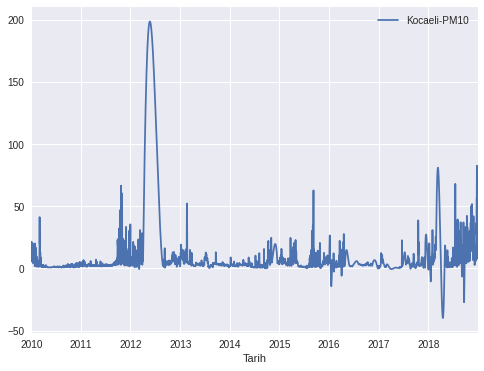

In [0]:
veri_PM10.plot()

In [0]:
#Yeniden örneklenen DataFrame, her ay için ayın son gününü içerir ve karşılık gelen değer, o aydaki değerlerin ortalamasıdır.
# Resample the data to the average monthly values
dataPM10_monthly = veri_PM10.resample("D").mean()

# Print the head of data
print(veri_PM10.head())

# Print the head of resampled data
print(dataPM10_monthly.head())

            Kocaeli-PM10
Tarih                   
2010-01-01          7.93
2010-01-02          8.99
2010-01-03         21.38
2010-01-04         15.61
2010-01-05         17.14
            Kocaeli-PM10
Tarih                   
2010-01-01          7.93
2010-01-02          8.99
2010-01-03         21.38
2010-01-04         15.61
2010-01-05         17.14


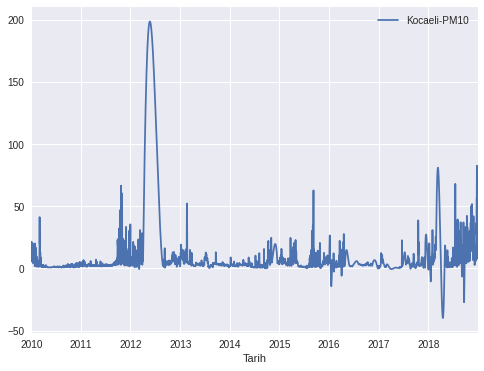

In [0]:
dataPM10_monthly.plot()

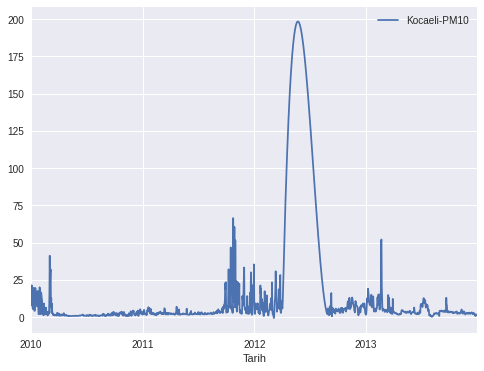

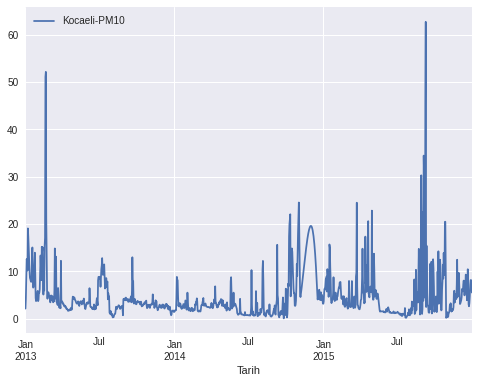

In [0]:
# Plot the data from 2000 to 2003
dataPM10_monthly["2010":"2013"].plot()
dataPM10_monthly["2013":"2015"].plot()

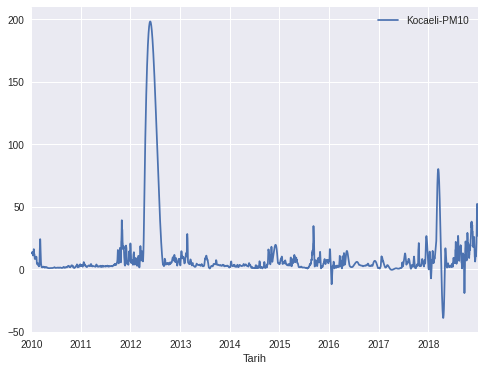

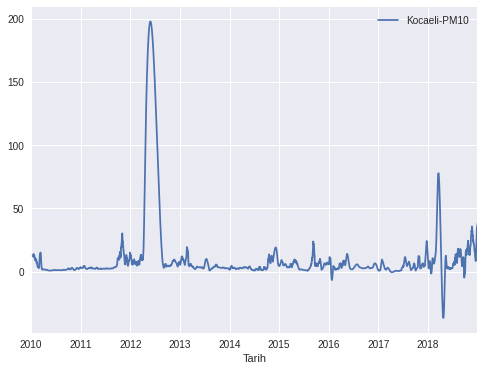

In [0]:
#Smoothing: rolling windows
# Plot the resampled data with a 6 months rolling average
dataPM10_monthly.rolling(6).mean().plot()

# Plot the resampled data with a 12 months rolling average
dataPM10_monthly.rolling(12).mean().plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


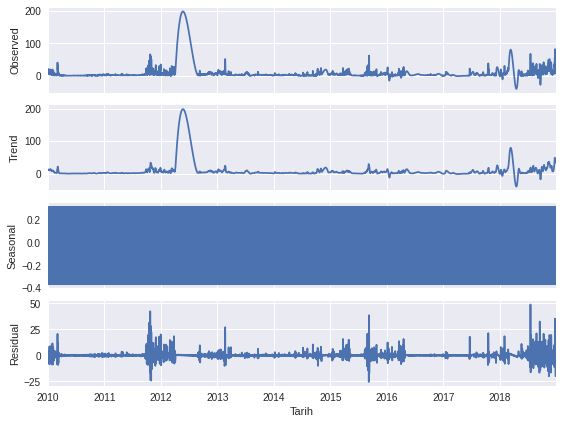

In [0]:
#Trend: general direction of the series (e.g. increasing)
#Sesonality: repeating patterns in data (e.g. sales around holidays..)
#Residuals: the rest
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot decomposed series
seasonal_decompose(dataPM10_monthly).plot();

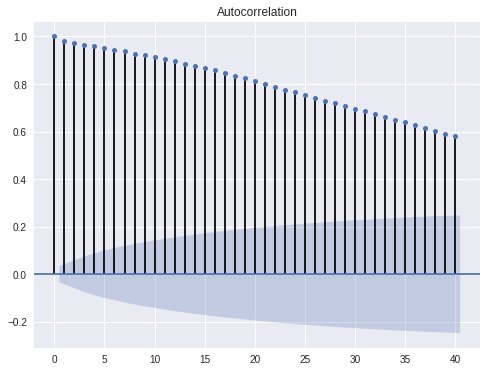

In [0]:
#Autocorrelation İki rastgele değişkenin korelasyonu, bir değişkenin diğerine bağımlılığının bir ölçüsüdür. Zaman serileri için, adından da anlaşılacağı gibi, _auto_correlation öz-korelasyonu ölçecektir - zaman serisinin kendisine bağımlılığı.
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(dataPM10_monthly, lags = 40);


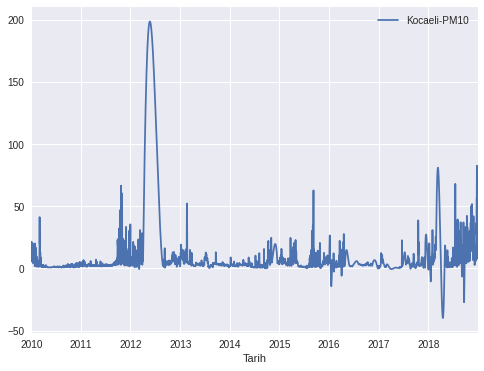

In [0]:
# Plot data_monthly again
dataPM10_monthly.plot()

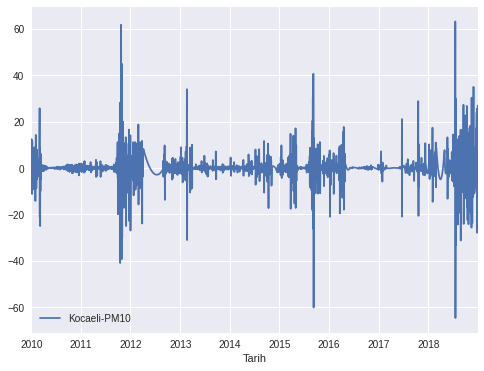

In [0]:
# Difference data_monthly
dataPM10_monthly_diff = dataPM10_monthly.diff()

# Show differenced values
dataPM10_monthly_diff.head()

dataPM10_monthly_diff.plot()

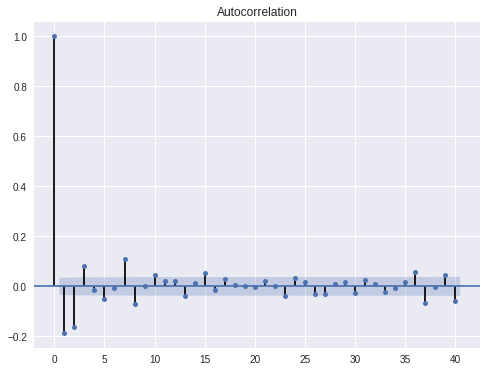

In [0]:
# Plot ACF for differenced data
plot_acf(dataPM10_monthly_diff.dropna(), lags=40);

            Kocaeli-PM10
Tarih                   
2010-01-01           NaN
2010-01-02           NaN
2010-01-03           NaN
2010-01-04      3.767207
2010-01-05      3.759179
2010-01-06     -8.125659
2010-01-07     -8.079829
2010-01-08      3.979208
2010-01-09      4.568360
2010-01-10      8.665819
            Kocaeli-PM10
Tarih                   
2018-12-22    -11.420211
2018-12-23      6.988677
2018-12-24      8.154349
2018-12-25     35.279179
2018-12-26     11.128627
2018-12-27     -6.755543
2018-12-28    -19.980792
2018-12-29           NaN
2018-12-30           NaN
2018-12-31           NaN


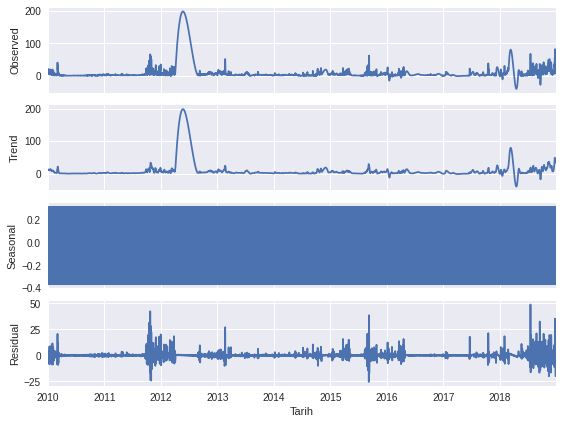

In [0]:
#Mevsimsellik ile başa çıkmak
# Plot seasonal decomposition of data_monthly again
seasonal_decompose(dataPM10_monthly).plot()

# Extract residuals and save
dataPM10_monthly_resid = seasonal_decompose(dataPM10_monthly).resid

# Print the head and tail of the residual compomnent
print(dataPM10_monthly_resid.head(10))
print(dataPM10_monthly_resid.tail(10))

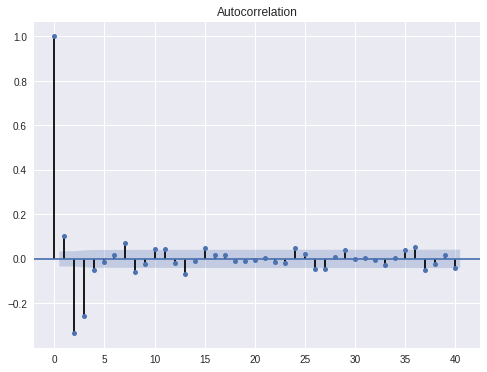

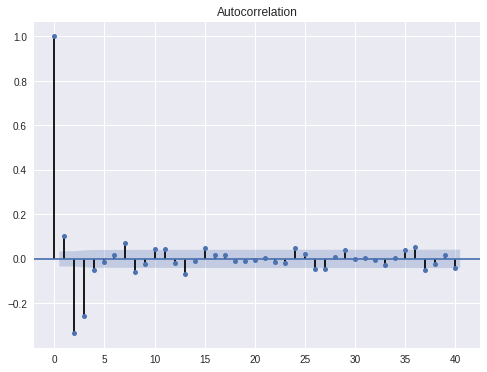

In [0]:
# Drop NaN values from residuals
dataPM10_monthly_resid = dataPM10_monthly_resid.dropna()

# Plot ACF of the residual component of data_monthly
plot_acf(dataPM10_monthly_resid, lags=40)

In [0]:
#Zaman Serileri Modeli
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# Fit the model to data_monthly_diff
model = ARMA(dataPM10_monthly_resid, order=(0,5))
result = model.fit()
# Print summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Kocaeli-PM10   No. Observations:                 3281
Model:                     ARMA(0, 5)   Log Likelihood               -8486.792
Method:                       css-mle   S.D. of innovations              3.211
Date:                Fri, 12 Jun 2020   AIC                          16987.585
Time:                        12:35:52   BIC                          17030.256
Sample:                    01-04-2010   HQIC                         17002.864
                         - 12-28-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.127e-05      0.000     -0.088      0.930      -0.000       0.000
ma.L1.Kocaeli-PM10    -0.1167      0.018     -6.653      0.000      -0.151      -0.082
ma.L2.Kocaeli-PM10    -0.5389      0.018    -29.556      0.000      -0.575      -0.503
ma.L3.Kocaeli-PM10    -0.3677      0.020    -18.562      0.000      -0.407      -0.329
ma.L4.Kocaeli-PM10    -0.0187      0.019     -1.008      0.314      -0.055       0.018
ma.L5.Kocaeli-PM10     0.0421      0.018      2.371      0.018       0.007       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -1.0288           -1.3764j            1.7185           -0.3522
MA.3           -1.0288           +1.3764j            1.7185            0.3522
MA.4           -2.1842           -0.0000j            2.1842           -0.5000
MA.5            3.6853           -0.0000j            3.6853           -0.0000
-----------------------------------------------------------------------------
"""

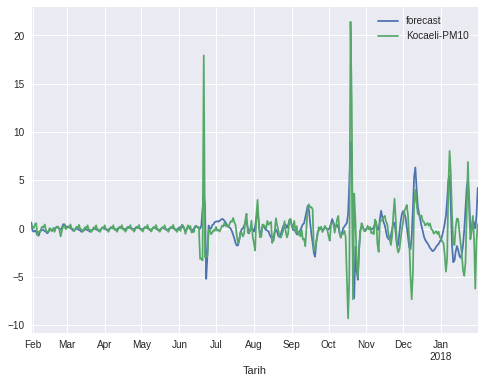

In [0]:
result.plot_predict(start="2017-01-31", end="2018-01-31");

In [0]:
pred = result.predict(start="2017-01-31", end="2018-01-31")
real = veri_PM10['2017-01-31':'2018-01-31']
print(real)
pred = pd.DataFrame(pred)
print(len(pred))
print(pred)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(real, pred)
print('MAE: %f' % mae)


from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real, pred)
print('MSE: %f' % mse)

from math import sqrt
mse = mean_squared_error(real, pred)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

print('MAE: %.3f'% metrics.mean_absolute_error(real, pred))
print('MASE: %.3f' % sqrt(metrics.mean_absolute_error(real, pred)))
print('MSE: %.3f'% metrics.mean_squared_error(real, pred))





            Kocaeli-PM10
Tarih                   
2017-01-31      6.640000
2017-02-01      6.280000
2017-02-02      5.760000
2017-02-03      5.830000
2017-02-04      5.130000
...                  ...
2018-01-27      8.779783
2018-01-28      7.920000
2018-01-29      6.320000
2018-01-30     12.910000
2018-01-31     13.480000

[366 rows x 1 columns]
366
                   0
Tarih               
2017-01-31  0.630545
2017-02-01 -0.230147
2017-02-02 -0.309054
2017-02-03 -0.179632
2017-02-04 -0.369796
...              ...
2018-01-27  0.919303
2018-01-28  0.574766
2018-01-29  0.022700
2018-01-30  1.380856
2018-01-31  4.212419

[366 rows x 1 columns]
MAE: 4.547447
MSE: 51.121678
RMSE: 7.149942
MAE: 4.547
MASE: 2.132
MSE: 51.122


In [0]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# 0 ile 2 arasında herhangi bir değer almak için p, d ve q parametrelerini tanımlayın
p = d = q = range(0, 2)

# Tüm farklı p, q ve q üçlülerini oluşturun
pdq = list(itertools.product(p, d, q))

# Mevsimsel p, q ve q üçüzlerinin tüm farklı kombinasyonlarını oluşturun
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(veri_PM10,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:31729.732991677232
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:28650.146032100445
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:25980.21067691692
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:25819.42260859916
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:25850.10297104132
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:25725.498109756663
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:25823.675394352875
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:25818.747236264513
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:27882.050964339716
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:25676.99113641235
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:23775.37263614733
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:23681.37468221303
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:23588.664349486724
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:23577.5685725287
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:23695.482153531608
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:23682.052256403564
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:20319.029867705944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:20234.793921528508


                                 Statespace Model Results                                 
Dep. Variable:                       Kocaeli-PM10   No. Observations:                 3287
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9982.348
Date:                            Fri, 12 Jun 2020   AIC                          19974.697
Time:                                    12:45:53   BIC                          20005.144
Sample:                                01-01-2010   HQIC                         19985.602
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3123      0.024     13.133      0.000       0.266       0.359
ma.L1         -0.5573      0.022   

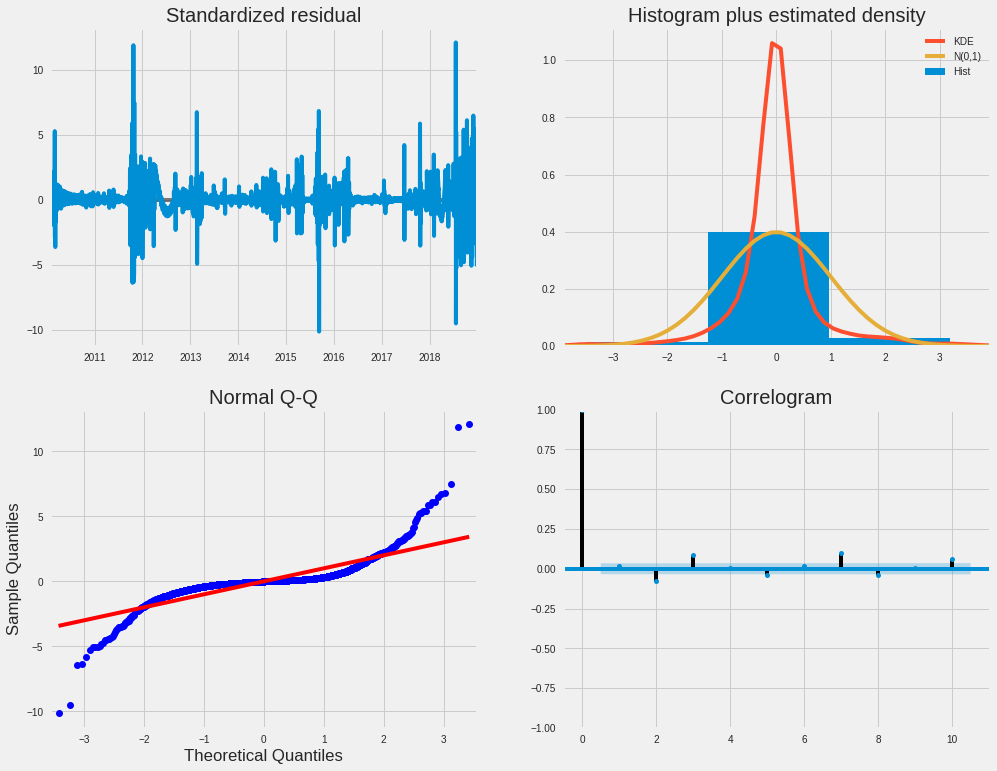

In [0]:
mod = sm.tsa.statespace.SARIMAX(veri_PM10,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())
results.plot_diagnostics(figsize=(15, 12))
plt.show()

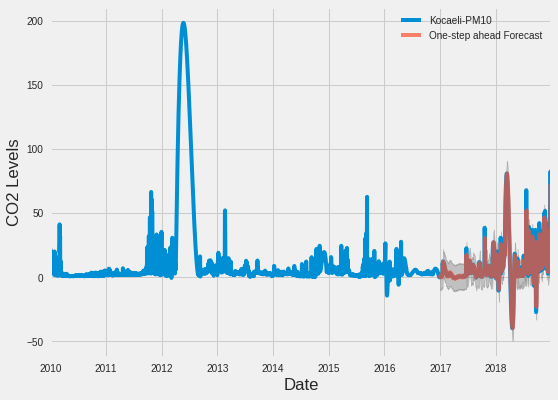

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = veri_PM10['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('PM10 Levels')
plt.legend()

plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = veri_PM10['2017-01-01':'2018-12-31']
y_forecasted = pd.DataFrame(y_forecasted)
print(y_forecasted)
print(y_truth)
# Compute the mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
error = mean_squared_error(y_truth,y_forecasted)
rmse=sqrt(error)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f'% metrics.mean_absolute_error(y_truth,y_forecasted))
print('MASE: %.3f' % sqrt(metrics.mean_absolute_error(y_truth,y_forecasted)))
print('MSE: %.3f'% metrics.mean_squared_error(y_truth,y_forecasted))


                    0
2017-01-01   0.676443
2017-01-02  -0.169504
2017-01-03   1.280509
2017-01-04   0.885654
2017-01-05   0.920321
...               ...
2018-12-27  56.182963
2018-12-28  36.666093
2018-12-29  23.425755
2018-12-30  13.931937
2018-12-31  14.971501

[730 rows x 1 columns]
            Kocaeli-PM10
Tarih                   
2017-01-01      0.640000
2017-01-02      1.950000
2017-01-03      1.480000
2017-01-04      0.775237
2017-01-05      0.372893
...                  ...
2018-12-27     30.250000
2018-12-28     14.800000
2018-12-29      7.830000
2018-12-30     13.360000
2018-12-31     40.250000

[730 rows x 1 columns]
RMSE: 7.237
MAE: 3.876
MASE: 1.969
MSE: 52.368


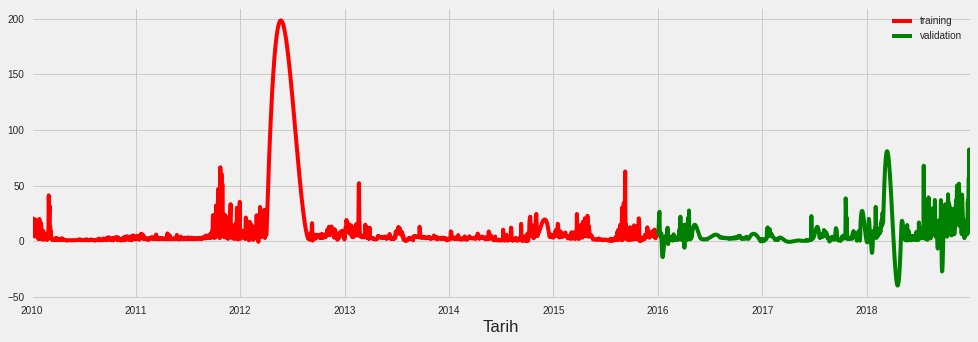

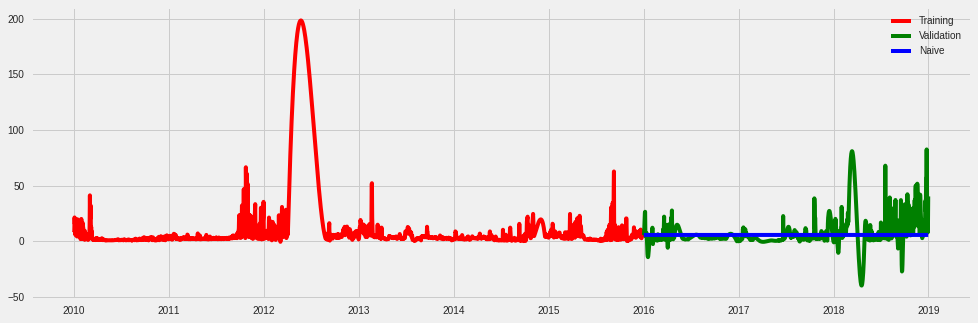

14.32861299342929

In [0]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
#for train_index, test_index in tscv.split(veri_PM10):
#    X_train, X_test = veri_PM10.iloc[train_index],veri_PM10.iloc[test_index]
#    y_train, y_test = veri_PM10.iloc[train_index], veri_PM10.iloc[test_index]
training= veri_PM10.loc['2010-01-01':'2016-01-01']
validation= veri_PM10.loc['2016-01-02':'2018-12-31 ']
plt.figure(figsize=(15,5))
training['Kocaeli-PM10'].plot(color='red', label= 'training')
validation['Kocaeli-PM10'].plot(color='green', label= 'validation')
plt.legend()
plt.show()
# dd= np.asarray(training.Count) 
y_hat = validation.copy() 
y_hat['naive'] = training['Kocaeli-PM10'][len(training['Kocaeli-PM10'])-1] # assigning last value of training set to all values in validation set

training.tail(1)
y_hat.head()

plt.figure(figsize= (15,5))
plt.plot(training['Kocaeli-PM10'], 'r', label= 'Training')
plt.plot(validation['Kocaeli-PM10'], 'g', label= 'Validation')
plt.plot(y_hat['naive'], 'b', label= 'Naive')
plt.legend(loc='best')
plt.show()


from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(validation['Kocaeli-PM10'],y_hat['naive']))
rmse